In [1]:
from IPython.display import HTML

video_id = "ZbZSe6N_BXs"
autoplay_html = f"""
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/{video_id}?autoplay=1" 
frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>
"""
HTML(autoplay_html)


In [2]:
import zipfile
import os

# Define paths
zip_path = "emotion.zip"  # If it's in the same directory
extract_path = "./emotion_data"  # Change if needed

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed! Files are in:", extract_path)




Extraction completed! Files are in: ./emotion_data


In [3]:
!pip install "numpy<2"



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install tensorflow 
#!pip install tensorflow==2.10.0

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
print(np.__version__)



1.26.4


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.26.4
TensorFlow version: 2.19.0


In [ ]:
#print("Number of images loaded:", len(images))
#print("Number of labels loaded:", len(labels))


In [2]:
import os

image_folder = "./emotion_data/train"  # Check in 'train' or 'test'

for emotion in os.listdir(image_folder):
    emotion_path = os.path.join(image_folder, emotion)
    if os.path.isdir(emotion_path):  # Ensure it's a folder
        num_images = len(os.listdir(emotion_path))
        print(f"Emotion: {emotion}, Images: {num_images}")



FileNotFoundError: [WinError 3] The system cannot find the path specified: './emotion_data/train'

In [3]:
import cv2
import numpy as np

image_folder = "./emotion_data/train"
images = []
labels = []

for emotion in os.listdir(image_folder):
    emotion_path = os.path.join(image_folder, emotion)
    
    if os.path.isdir(emotion_path):  # Ensure it's a folder
        for img_file in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
            if img is not None:
                img = cv2.resize(img, (48, 48))  # Resize to 48x48
                images.append(img)
                labels.append(emotion)

print("Total images loaded:", len(images))


FileNotFoundError: [WinError 3] The system cannot find the path specified: './emotion_data/train'

In [4]:
import os

image_folder = "./emotion_data/train"

# Check if the path exists
if os.path.exists(image_folder):
    print("✅ Path exists:", image_folder)
    print("Subfolders (emotions):", os.listdir(image_folder))
else:
    print("❌ Path does NOT exist! Check the directory.")


❌ Path does NOT exist! Check the directory.


✅ Successfully loaded 28709 images from './emotion_data/train'.


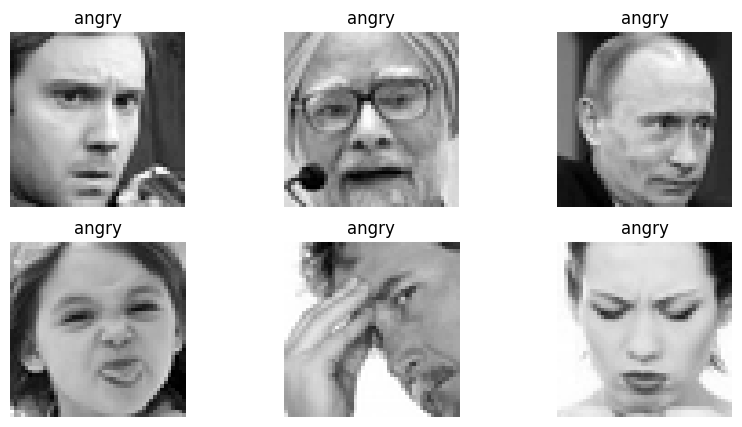

🎯 Preprocessing completed successfully!


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
data_path = "./emotion_data/train"  # Ensure this is correct (either 'train' or 'test')
img_size = (48, 48)  # Standard size for FER models

# Function to load and preprocess images
def load_images(data_path, img_size):
    images = []
    labels = []

    if not os.path.exists(data_path):  # Check if path exists
        print(f"❌ Error: Path '{data_path}' does not exist!")
        return np.array([]), np.array([])

    classes = sorted(os.listdir(data_path))  # Sorted for consistent order

    for label in classes:
        class_path = os.path.join(data_path, label)
        if os.path.isdir(class_path):  # Ensure it's a directory
            image_files = os.listdir(class_path)
            if not image_files:
                print(f"⚠️ Warning: No images found in '{label}' folder!")

            for img_name in image_files:
                img_path = os.path.join(class_path, img_name)

                # Check if file is an image
                if not img_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
                    print(f"⚠️ Skipping non-image file: {img_name}")
                    continue

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                if img is not None:
                    img = cv2.resize(img, img_size)  # Resize
                    img = img / 255.0  # Normalize pixel values
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"❌ Error: Failed to load image: {img_path}")

    if not images:
        print("🚨 No valid images loaded! Check dataset path and files.")
        return np.array([]), np.array([])

    return np.array(images), np.array(labels)

# Load images
images, labels = load_images(data_path, img_size)

# Check if images were loaded
if images.size == 0:
    print("🚨 No images found. Fix dataset path or file issues.")
else:
    print(f"✅ Successfully loaded {len(images)} images from '{data_path}'.")

    # Visualize some images
    plt.figure(figsize=(10, 5))
    for i in range(min(6, len(images))):  # Ensure it doesn't exceed available images
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Data Augmentation (if needed)
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

print("🎯 Preprocessing completed successfully!")


In [15]:
!pip install deepface



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!python --version


Python 3.11.5


In [16]:
from deepface import DeepFace

img_path = "./emotion_data/test/happy/im1.png"  # Use a real image path
result = DeepFace.analyze(img_path, actions=['emotion'])
print(result)


ImportError: cannot import name 'LocallyConnected2D' from 'tensorflow.keras.layers' (C:\Users\WELCOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\_tf_keras\keras\layers\__init__.py)

In [ ]:
from deepface import DeepFace

img_path = "./emotion_data/test/surprised/im62.png"  # Use a real image path
result = DeepFace.analyze(img_path, actions=['emotion'])

# Extract the dominant emotion
dominant_emotion = result[0]['dominant_emotion']
confidence = result[0]['emotion'][dominant_emotion]

print(f"Detected Emotion: {dominant_emotion} ({confidence:.2f}%)")


In [ ]:
from deepface import DeepFace
import tkinter as tk
from tkinter import filedialog

# Open file dialog to select an image
root = tk.Tk()
root.withdraw()  # Hide the root window
img_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])

if img_path:  # Ensure an image was selected
    result = DeepFace.analyze(img_path, actions=['emotion'])
    
    # Extract the dominant emotion
    dominant_emotion = result[0]['dominant_emotion']
    confidence = result[0]['emotion'][dominant_emotion]
    
    print(f"Detected Emotion: {dominant_emotion} ({confidence:.2f}%)")
else:
    print("No image selected.")

In [ ]:
import os
import cv2
import numpy as np
from deepface import DeepFace
from sklearn.metrics import accuracy_score

# Define test dataset path
test_path = "./emotion_data/test"

# Load test images and their actual labels
def load_test_images(test_path):
    images = []
    true_labels = []
    class_names = os.listdir(test_path)

    for label in class_names:
        class_path = os.path.join(test_path, label)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                images.append(img_path)
                true_labels.append(label)  # Store actual emotion label

    return images, true_labels, class_names

# Load test data
test_images, true_labels, class_names = load_test_images(test_path)
print(f"Loaded {len(test_images)} test images.")

# Predict emotions using DeepFace
pred_labels = []

for img_path in test_images:
    try:
        result = DeepFace.analyze(img_path, actions=['emotion'], enforce_detection=False)
        predicted_emotion = result[0]['dominant_emotion']
        pred_labels.append(predicted_emotion)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        pred_labels.append("unknown")  # Handle errors gracefully

# Filter out invalid predictions
valid_indices = [i for i in range(len(pred_labels)) if pred_labels[i] != "unknown"]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_pred_labels = [pred_labels[i] for i in valid_indices]

# Calculate Accuracy
accuracy = accuracy_score(filtered_true_labels, filtered_pred_labels)
print(f"DeepFace Accuracy on Test Set: {accuracy * 100:.2f}%")

# Print sample results
for i in range(5):
    print(f"Actual: {filtered_true_labels[i]}, Predicted: {filtered_pred_labels[i]}")


In [ ]:
import cv2
from deepface import DeepFace

# Load OpenCV's pre-trained Haar cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = frame[y:y+h, x:x+w]

        try:
            # Use DeepFace to analyze emotions
            result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

            # Get the dominant emotion
            dominant_emotion = result[0]['dominant_emotion']
            confidence = result[0]['emotion'][dominant_emotion]

            # Draw rectangle around face and display emotion
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"{dominant_emotion} ({confidence:.2f}%)", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        except Exception as e:
            print(f"Error: {e}")

    # Show the output frame
    cv2.imshow("Facial Emotion Recognition", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
from deepface import DeepFace
import numpy as np
from IPython.display import display, clear_output
import PIL.Image

# Load OpenCV Haar cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = frame[y:y+h, x:x+w]

        try:
            # Analyze emotions using DeepFace
            result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

            # Get dominant emotion
            dominant_emotion = result[0]['dominant_emotion']
            confidence = result[0]['emotion'][dominant_emotion]

            # Draw rectangle and emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"{dominant_emotion} ({confidence:.2f}%)", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        except Exception as e:
            print(f"Error: {e}")

    # Convert frame to RGB for Jupyter Notebook
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = PIL.Image.fromarray(rgb_frame)

    # Clear previous output and display new frame
    clear_output(wait=True)
    display(img)

    # Exit loop if 'q' is pressed (not needed in notebook, but useful for debugging)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release webcam
cap.release()
cv2.destroyAllWindows()


In [ ]:
!pip install ipywidgets


In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip uninstall -y ipywidgets
!{sys.executable} -m pip install ipywidgets





In [ ]:
import sys
!{sys.executable} -m pip show jupyter



In [ ]:
import sys
!{sys.executable} -m pip uninstall -y ipywidgets
!{sys.executable} -m pip install ipywidgets



In [ ]:
import sys
!{sys.executable} -m pip uninstall -y jupyter notebook jupyter-core jupyter-client ipywidgets widgetsnbextension




In [ ]:
import sys
!{sys.executable} -m pip install --upgrade jupyter notebook ipywidgets


In [ ]:
!jupyter --version


In [ ]:
import sys
!{sys.executable} -m pip install jupyter_contrib_nbextensions jupyter_nbextensions_configurator



In [ ]:
import cv2
import numpy as np
import PIL.Image
import io
import base64
import IPython.display as display
from deepface import DeepFace
import matplotlib.pyplot as plt
from ipywidgets import widgets

# Function to capture image from webcam
def capture_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None
    
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        print("Error: Could not capture image.")
        return None
    
    # Convert image to RGB format
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Convert image to PIL format
    img = PIL.Image.fromarray(frame_rgb)
    return img

# Function to save and analyze emotion
def analyze_emotion():
    img = capture_image()
    if img is None:
        return
    
    # Display captured image
    display.display(img)
    
    # Save image
    img_path = "captured_image.jpg"
    img.save(img_path)
    
    # Analyze emotion using DeepFace
    result = DeepFace.analyze(img_path=img_path, actions=['emotion'], enforce_detection=False)
    emotion = result[0]['dominant_emotion']
    
    print(f"🎭 Detected Emotion: {emotion}")

# Create button to capture and analyze emotion
button = widgets.Button(description="Capture & Analyze Emotion")
button.on_click(lambda b: analyze_emotion())
display.display(button)


In [ ]:
!pip install yt_dlp google-search-results


In [4]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install opencv-python-headless


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install numpy
!pip install deepface
!pip install tqdm
!pip install yt-dlp
!pip install pillow
!pip install ipython


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached deepface-0.0.93-py3-none-any.whl (108 kB)
  Using cached flask_cors-5.0.1-py3-none-any.whl (11 kB)
  Using cached flask-3.1.0-py3-none-any.whl (102 kB)
  Using cached retina_face-0.0.17-py3-none-any.whl (25 kB)
  Using cached fire-0.7.0.tar.gz (87 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl (85 kB)
  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
  Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
  Using cached pillow-11.2.0-cp310-cp310-win_amd64.whl (13.8 MB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached keras-3.9.1-py3-none-any.whl (1.3 MB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached mtcnn-1.0.0-py3-none-any.whl (1.9 MB)
  Using cached termcolor-3.0.0-py3-none-any.whl (6.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Using cached click-8.1.8-py3-none-any.whl (98 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.w

You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached yt_dlp-2025.3.31-py3-none-any.whl (3.2 MB)


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


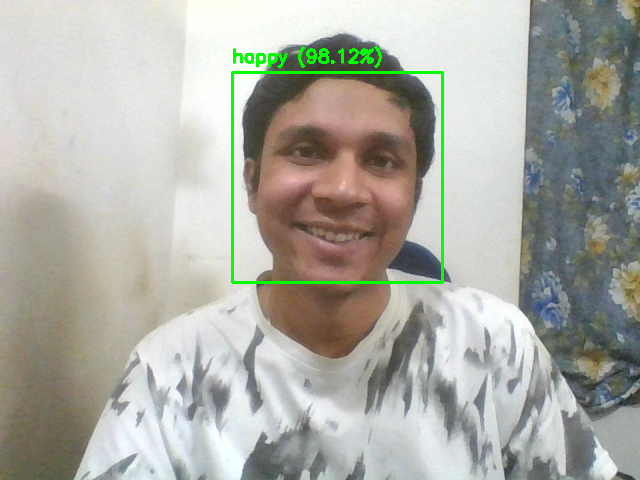

🎭 Detected Emotion: happy
🎶 Recommended Songs:
1. Jeene Laga Hoon
2. Badtameez Dil
3. Gallan Goodiyan
4. Kala Chashma
5. London Thumakda

 Selecting song for You !
🎵 Now Playing: London Thumakda 
🔗 https://www.youtube.com/watch?v=udra3Mfw2oo?autoplay=1&fs=1&vq=hd1080

⏳ Opening YouTube...


Loading: 100%|▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞▞| 10/10 [00:02<00:00,  4.64it/s]


In [3]:
import cv2
import random
import time
import webbrowser
import numpy as np
from deepface import DeepFace
from tqdm import tqdm
from yt_dlp import YoutubeDL
from IPython.display import display, clear_output, HTML
import PIL.Image

# Load OpenCV Haar cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)
time.sleep(2)  # Give the camera some time to warm up

# Capture a single frame
ret, frame = cap.read()
cap.release()  # Release the webcam immediately after capturing

# Initialize emotion variable
detected_emotion = None  

if not ret:
    print("❌ Failed to capture image from webcam.")
else:
    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    if len(faces) == 0:
        print("⚠️ No face detected in the image.")
    else:
        for (x, y, w, h) in faces:
            face_roi = frame[y:y+h, x:x+w]

            try:
                # Analyze emotions using DeepFace
                result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

                # Get dominant emotion
                detected_emotion = result[0]['dominant_emotion']
                confidence = result[0]['emotion'][detected_emotion]

                # Draw rectangle and label on image
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f"{detected_emotion} ({confidence:.2f}%)", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            except Exception as e:
                detected_emotion = f"Error: {e}"

        # Convert frame to RGB for Jupyter Notebook display
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = PIL.Image.fromarray(rgb_frame)

        # Clear previous output and display image
        clear_output(wait=True)
        display(img)

        # Display detected emotion
        display(HTML(f"<h2 style='text-align:center;'>🎭 Detected Emotion: {detected_emotion}</h2>"))


# 🎵 Emotion-to-Song Mapping
emotion_to_songs = {
    "happy": ["Jeene Laga Hoon", "Badtameez Dil", "Gallan Goodiyan", "Kala Chashma", "London Thumakda"],
    "sad": ["Agar Tum Saath Ho", "Tujhe Bhula Diya", "Channa Mereya", "Tum Hi Ho", "Phir Le Aya Dil"],
    "angry": ["Sultan Title Track", "Allah Duhai Hai", "Get Ready To Fight", "Jee Karda", "Dhaakad"],
    "fear": ["O Saathi Re", "Tadap Tadap Ke", "Koi Fariyaad", "Aye Dil Hai Mushkil", "Bhool Bhulaiyaa Title Track"],
    "neutral": ["Ilahi", "Zindagi Na Milegi Dobara - Senorita", "Phir Se Ud Chala", "Love You Zindagi", "Patakha Guddi"],
    "surprise": ["Urvashi", "Dil Dhadakne Do", "Nashe Si Chadh Gayi", "Badtameez Dil", "Dhoom Again"],
    "disgust": ["Emotional Atyachar", "Bhaag D.K. Bose", "Jalwa", "Swag Se Swagat", "Badtameez Dil"]
}

# Function to play song from YouTube in Full-Screen
def play_song_from_youtube(song_name):
    query = f"{song_name} Hindi song"
    
    ydl_opts = {
        'format': 'best',
        'noplaylist': True,
        'quiet': True
    }

    print("\n Selecting song for You !")
    with YoutubeDL(ydl_opts) as ydl:
        try:
            results = ydl.extract_info(f"ytsearch5:{query}", download=False)["entries"]
            if results:
                first_video = results[0]["webpage_url"]
                full_screen_url = first_video + "?autoplay=1&fs=1&vq=hd1080"

                print(f"🎵 Now Playing: {song_name} \n🔗 {full_screen_url}")

                # Loading Animation
                print("\n⏳ Opening YouTube...")
                for _ in tqdm(range(10), desc="Loading", ncols=75, ascii=" ▖▘▝▗▚▞"):
                    time.sleep(0.2)  

                # Open YouTube in Full-Screen AutoPlay
                webbrowser.open(full_screen_url, new=2)
            else:
                print("❌ No video found.")
        except Exception as e:
            print(f"❌ Error fetching video: {e}")

# Function to recommend & play a song based on detected emotion
def play_song_by_emotion(emotion):
    if emotion in emotion_to_songs:
        song_list = emotion_to_songs[emotion]
        print(f"🎭 Detected Emotion: {emotion}")
        print("🎶 Recommended Songs:")
        for idx, song in enumerate(song_list, 1):
            print(f"{idx}. {song}")

        # Automatically select a random song
        selected_song = random.choice(song_list)

        # Play the selected song
        play_song_from_youtube(selected_song)
    else:
        print("❌ Emotion not recognized.")

# 🚀 Start Process
if detected_emotion:
    play_song_by_emotion(detected_emotion)
else:
    print("❌ No emotion detected.")
